# Adikteev test

Objective:
- prediction of a click
- prediction of conversion

It seems, we are dealing here with 2 binary classifications problems

# load and explore data

In [1]:
# import package for exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# system import
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [14, 8]

#fix random seed for reproductibility
np.random.seed(42)

In [2]:
%ls

adikteev_sylvain.ipynb  anova.png  campaign.csv  campaign.csv.gz  chi2.png


In [3]:
df = pd.read_csv("campaign.csv")

In [4]:
df.head()

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,...,os,city,adSpacePrimaryThematic,deviceReferrer,formatId,containerId,advertiserId,creativeId,click,conversion
0,1493337601,41.837,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,iOS,Bourg-les-valence,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
1,1493337602,14.431,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,iOS,Joeuf,NEWS,other,111,8338,310,24595,0,0
2,1493337615,63.729,0.0,0.0,0.0,0.0,5.109,0.0,0.0,0.0,...,iOS,Aubervilliers,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
3,1493337703,43.345,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,iOS,Vigneux-sur-seine,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
4,1493337828,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,iOS,Barbey,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0


In [5]:
df.describe()

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,...,last30dAdClosingsOnAdvertiser,last30dAdClosingsOnContainer,last30dAdClosingsOnFormat,adSpaceId,formatId,containerId,advertiserId,creativeId,click,conversion
count,9.629730e+05,962973.000000,962973.000000,962973.000000,962973.000000,962973.000000,962973.000000,962973.000000,962973.000000,962973.000000,...,962973.000000,962973.000000,962973.000000,962973.00000,962973.0,962973.0,962973.0,962973.0,962973.000000,962973.000000
mean,1.493390e+09,9.180603,0.320357,0.604956,0.253501,0.100404,0.628993,0.764869,0.666523,0.539791,...,0.067158,0.067158,0.093750,3149.22899,111.0,8338.0,310.0,24595.0,0.098368,0.000433
std,1.964874e+04,24.588960,3.780642,5.068239,2.519138,1.967956,5.449021,6.305687,5.726105,4.835396,...,0.516015,0.516015,0.871682,1836.45527,0.0,0.0,0.0,0.0,0.297812,0.020805
min,1.493338e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,569.00000,111.0,8338.0,310.0,24595.0,0.000000,0.000000
25%,1.493371e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1750.00000,111.0,8338.0,310.0,24595.0,0.000000,0.000000
50%,1.493392e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2254.00000,111.0,8338.0,310.0,24595.0,0.000000,0.000000
75%,1.493408e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5172.00000,111.0,8338.0,310.0,24595.0,0.000000,0.000000
max,1.493424e+09,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,71.000000,71.000000,126.000000,6166.00000,111.0,8338.0,310.0,24595.0,1.000000,1.000000


In [6]:
df.columns

Index(['timestamp', 'admantx_art_and_entertainment', 'admantx_automotive',
       'admantx_business', 'admantx_careers', 'admantx_education',
       'admantx_family_and_parenting', 'admantx_health_and_fitness',
       'admantx_food_and_drink', 'admantx_hobbies_and_interests',
       ...
       'os', 'city', 'adSpacePrimaryThematic', 'deviceReferrer', 'formatId',
       'containerId', 'advertiserId', 'creativeId', 'click', 'conversion'],
      dtype='object', length=135)

In [7]:
df.click.unique()

array([0, 1])

In [8]:
df.conversion.unique()

array([0, 1])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962973 entries, 0 to 962972
Columns: 135 entries, timestamp to conversion
dtypes: float64(23), int64(106), object(6)
memory usage: 991.8+ MB


# Prediction of click

First determine, categorical and numerical variables:

In [10]:
num_cols = df._get_numeric_data().columns[:-2] # remove click and conversion which are target variables

In [11]:
df.columns

Index(['timestamp', 'admantx_art_and_entertainment', 'admantx_automotive',
       'admantx_business', 'admantx_careers', 'admantx_education',
       'admantx_family_and_parenting', 'admantx_health_and_fitness',
       'admantx_food_and_drink', 'admantx_hobbies_and_interests',
       ...
       'os', 'city', 'adSpacePrimaryThematic', 'deviceReferrer', 'formatId',
       'containerId', 'advertiserId', 'creativeId', 'click', 'conversion'],
      dtype='object', length=135)

In [12]:
cat_cols = list(set(df.columns[:-2]) - set(num_cols)) # categorical columns

Before modeling, we will do a statistical test for numerical and categorical variables for click to determine dependency. For numerical variables, we will use ANOVA test and for categorical chi2 test.\

Let's start with numerical variables.

In [13]:
import scipy.stats as stats

def anova(data, categorical, numerical):
    anv = pd.DataFrame()
    pvals =[]
    samples = []
    for cls in data[categorical].unique():
        s = data[data[categorical] == cls][numerical].values
        samples.append(s)
    return stats.f_oneway(*samples)[1]

In [14]:
pvalues_num = []
disparity = []
for col in num_cols:
    pvalue = anova(df, "click", col)
    pvalues_num.append(pvalue)
    disparity.append(np.log(1/(pvalue+1.0e-6)))

anv_num = pd.DataFrame()
anv_num['feature'] = num_cols
anv_num['p-value'] = pvalues_num
anv_num["disparity"] = disparity

/home/sylvain/modelr-notebook/lib/python3.8/site-packages/scipy/stats/stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


Numerical variable with a p-value <0.05 seem to influence click variable as seen below:

In [15]:
anv_num = anv_num.sort_values('p-value')
anv_num = anv_num[anv_num["p-value"]<0.05]

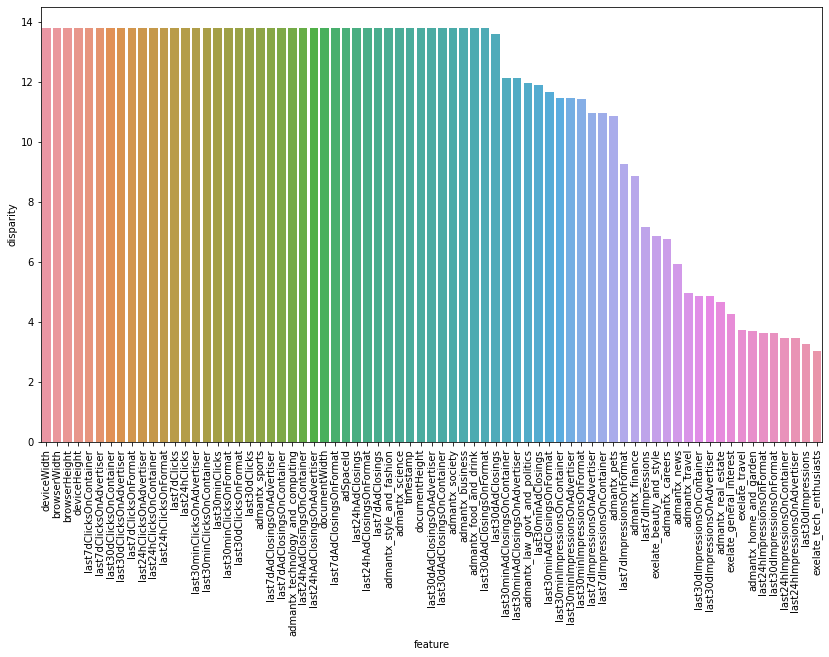

In [16]:
sns.barplot(data=anv_num, x='feature', y='disparity')
x=plt.xticks(rotation=90)
plt.savefig("anova.png", dpi=300, bbox_inches='tight')

On the figure below, saturation of the feature is due to 1.0e-6 term. Most statisticaly significant features are listed by order of importance as they all get a p-value <5%.

Now, let's have a look to categorical variable. For that, we will use the chi2 test:

In [17]:
from scipy.stats import chi2_contingency

def chi2(data, target, category):
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df[category], df[target]))
    return p
    

In [18]:
pvalues_num = []
disparity = []
for col in cat_cols:
    pvalue = chi2(df, "click", col)
    pvalues_num.append(pvalue)
    disparity.append(np.log(1/(pvalue+1.0e-6)))

chi2_cat = pd.DataFrame()
chi2_cat['feature'] = cat_cols
chi2_cat['p-value'] = pvalues_num
chi2_cat["disparity"] = disparity
chi2_cat = chi2_cat.sort_values('p-value')
chi2_cat = chi2_cat[chi2_cat["p-value"]<0.05]

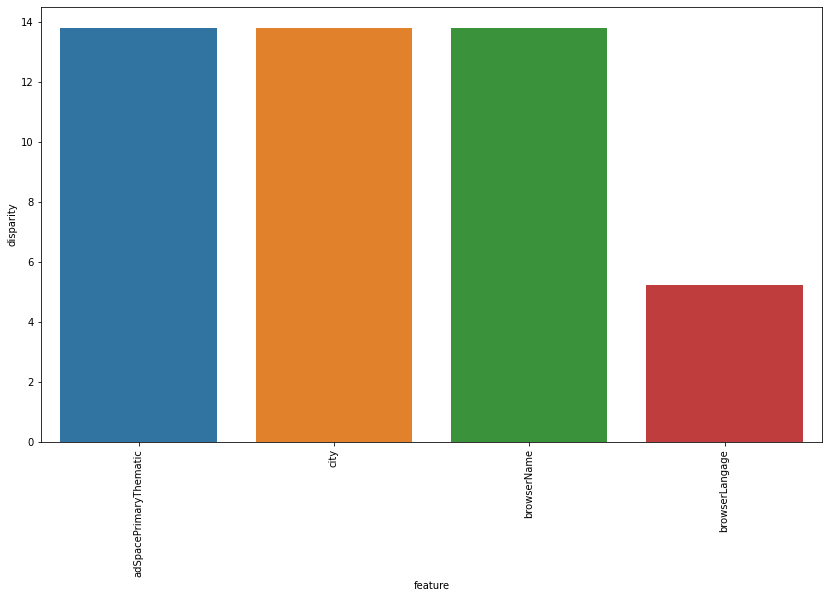

In [19]:
sns.barplot(data=chi2_cat, x='feature', y='disparity')
x=plt.xticks(rotation=90)
plt.savefig("chi2.png", dpi=300, bbox_inches='tight')

Here are the feature that can be selected with chi2 test for categorical variable which are more likely to have influence.

Now, lets encode categorical variables and see feature importance with xgboost

In [20]:
df_encoded = pd.get_dummies(df, columns=cat_cols, sparse=True).copy()

In [21]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962973 entries, 0 to 962972
Columns: 5423 entries, timestamp to browserName_other
dtypes: Sparse[uint8, 0](5294), float64(23), int64(106)
memory usage: 975.3 MB


Final dataset seem now really big. We will deal with from now with sparse tools.

In [22]:
from scipy.sparse import csr_matrix

df_sparsed = df_encoded.drop(['click', 'conversion'], axis=1).astype(pd.SparseDtype("float", np.nan))
X = csr_matrix(df_sparsed.sparse.to_coo())

y = np.expand_dims(df_encoded['click'], axis=1)

In [23]:
import xgboost as xgb

# Instantiation
xgb_c = xgb.XGBClassifier(n_estimators = 20, seed = 42)

In [24]:
xgb_c.fit(X, y)

/home/sylvain/modelr-notebook/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sylvain/modelr-notebook/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[16:49:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Text(0.5, 0, 'Xgboost Feature Importance')

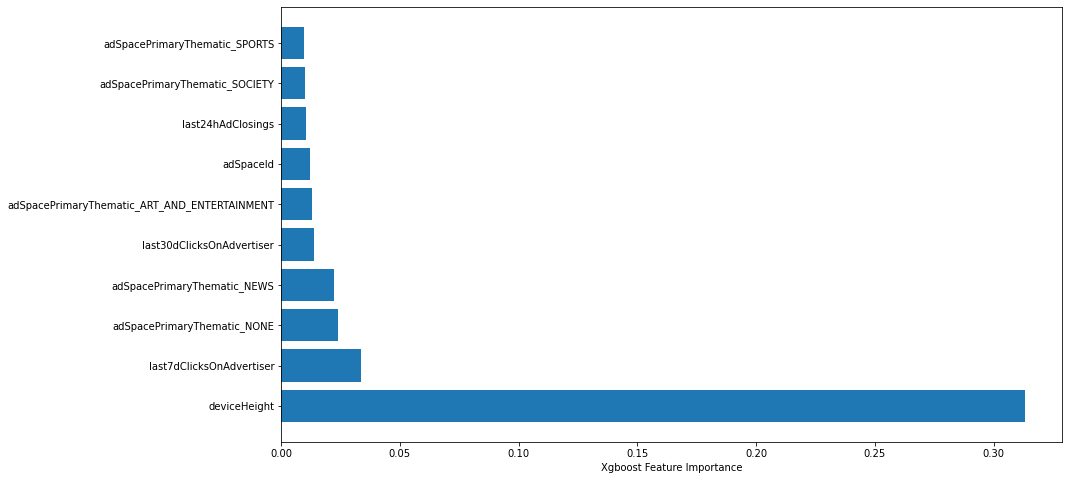

In [25]:
sorted_idx = (-xgb_c.feature_importances_).argsort()
feature_names = np.array(df_sparsed.columns.tolist())
plt.barh(feature_names[sorted_idx][:10], xgb_c.feature_importances_[sorted_idx][:10])
plt.xlabel("Xgboost Feature Importance")

Here are the features selected as important by xgboost classifier, it seems consistent with the statistical test made earlier.

Let's start modeling of click. It is a binary classification problem. First, we should have a look to its distribution

/home/sylvain/modelr-notebook/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='click', ylabel='count'>

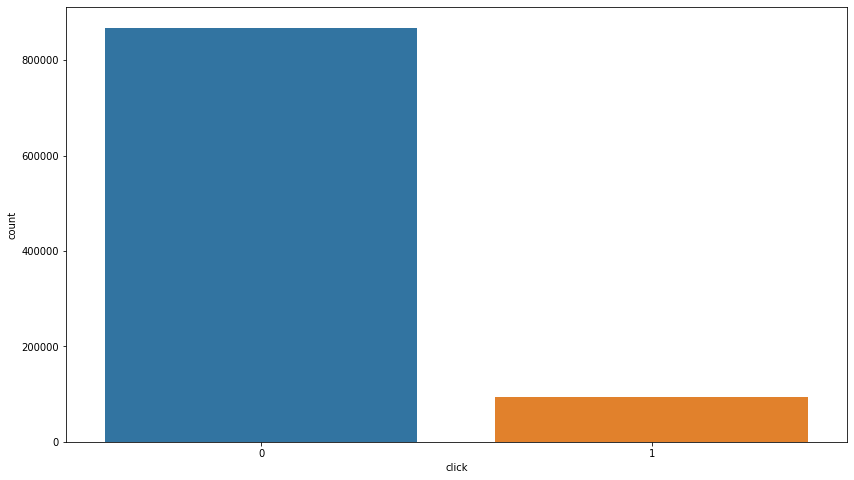

In [26]:
sns.countplot(df.click)

In [27]:
# what is the unbalance?

scale_pos_weight= len(df.loc[df.click ==0])/len(df.loc[df.click ==1])

The Click distribution is unbalanced. Consequently, we should use a metric adapted such as AUC or F1-score.
Click is categorical variable, so we should go for a binary classification model. We will continue with xgb as we got a lot of feature that require sparsity support.

In [28]:
# # lets keep columns obtained statistical test
# keeping_columns = anv_num["feature"].tolist()
# keeping_columns.extend(chi2_cat["feature"].tolist())
# keeping_columns.extend(["click"])
# df_new = df[keeping_columns].copy()
# df_encoded = pd.get_dummies(df, columns=chi2_cat["feature"].tolist(), sparse=True).copy()

# df_sparsed = df_encoded.drop(['click'], axis=1).astype(pd.SparseDtype("float", np.nan))
# X = csr_matrix(df_sparsed.sparse.to_coo())

# y = np.expand_dims(df_encoded['click'], axis=1)

I did want to test with removing features but kernel keep crashing. I will continue the test like this. I have no time to investigate further..

In [29]:
from sklearn.metrics import f1_score, auc

Let's build first our train/test split for evaluation of our model.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
# Instantiation
xgb_c = xgb.XGBClassifier(n_estimators = 100, seed = 42, scale_pos_weight=scale_pos_weight)

Below we train our model:

In [32]:
xgb_c.fit(X_train, y_train)

/home/sylvain/modelr-notebook/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sylvain/modelr-notebook/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[16:49:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=9.165878428309018,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Now, let's evaluate this model:

In [33]:
p_test = xgb_c.predict_proba(X_test)[:, 1]

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, p_test)

0.6711579301939136

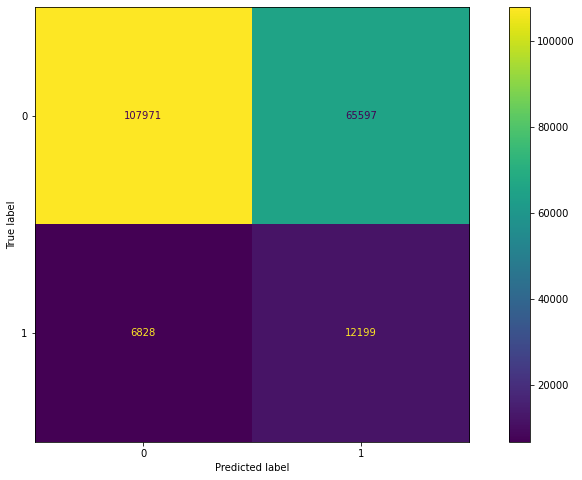

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_c, X_test, y_test) 
plt.show()

In [36]:
y_pred = xgb_c.predict(X_test)
f1_score(y_test, y_pred, average='macro')

0.5004149682639933

AUC of 67% or F1 score of 50% are not good score. Anyway, it is better than random. The quality of the model is poor. When we look at confusion matrix, the model over-predict. It may be balance with a better choice ofor scale_pos_weight.\

For improvement, we should consider better feature engineering, and that require more exploration which i couldn't do in the amount of time considered. I may have consider as numerical some variable, but it could be categorical. It needs further investigation there.

We may also consider reduce dimension with PCA, test other modeling approach than xgboost. I did use this model because it is known to work most of the time. 

# Prediction of conversion

First, we should create the dataset by removing rows with no click, because we are interested to the modeling of conversion once the user has clicked.

In [37]:
df_conversion = df.loc[df.click == 1].copy().drop(columns="click")

In [38]:
pvalues_num = []
disparity = []
for col in num_cols:
    pvalue = anova(df_conversion, "conversion", col)
    pvalues_num.append(pvalue)
    disparity.append(np.log(1/(pvalue+1.0e-6)))

anv_num = pd.DataFrame()
anv_num['feature'] = num_cols
anv_num['p-value'] = pvalues_num
anv_num["disparity"] = disparity

/home/sylvain/modelr-notebook/lib/python3.8/site-packages/scipy/stats/stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [39]:
anv_num = anv_num.sort_values('p-value')
anv_num = anv_num[anv_num["p-value"]<0.05]

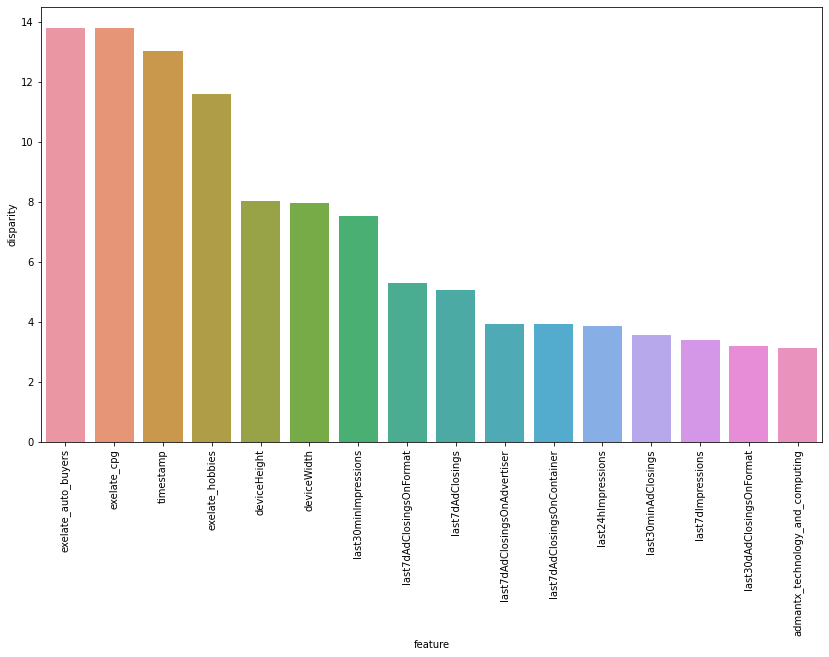

In [40]:
sns.barplot(data=anv_num, x='feature', y='disparity')
x=plt.xticks(rotation=90)
plt.savefig("anova.png", dpi=300, bbox_inches='tight')

In [41]:
pvalues_num = []
disparity = []
for col in cat_cols:
    pvalue = chi2(df_conversion, "conversion", col)
    pvalues_num.append(pvalue)
    disparity.append(np.log(1/(pvalue+1.0e-6)))

chi2_cat = pd.DataFrame()
chi2_cat['feature'] = cat_cols
chi2_cat['p-value'] = pvalues_num
chi2_cat["disparity"] = disparity
chi2_cat = chi2_cat.sort_values('p-value')
chi2_cat = chi2_cat[chi2_cat["p-value"]<0.05]

In [42]:
chi2_cat.empty

True

In [43]:
df_encoded = pd.get_dummies(df_conversion, columns=cat_cols, sparse=True).copy()

In [44]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94726 entries, 5 to 962966
Columns: 4244 entries, timestamp to browserName_other
dtypes: Sparse[uint8, 0](4116), float64(23), int64(105)
memory usage: 95.9 MB


In [45]:
df_sparsed = df_encoded.drop(['conversion'], axis=1).astype(pd.SparseDtype("float", np.nan))
X = csr_matrix(df_sparsed.sparse.to_coo())

y = np.expand_dims(df_encoded['conversion'], axis=1)

In [46]:
# Instantiation
xgb_c = xgb.XGBClassifier(n_estimators = 20, seed = 42)

/home/sylvain/modelr-notebook/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sylvain/modelr-notebook/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[16:51:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Text(0.5, 0, 'Xgboost Feature Importance')

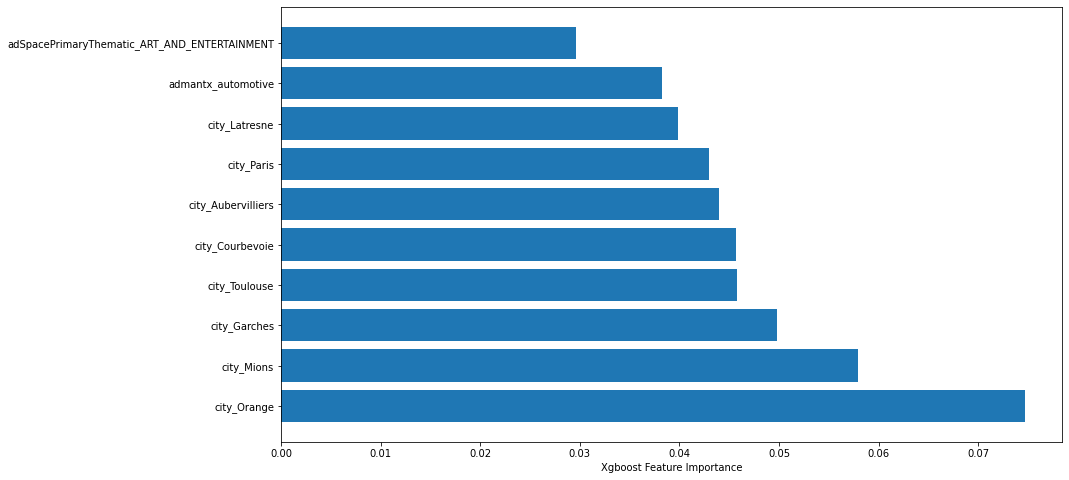

In [47]:
xgb_c.fit(X, y)
sorted_idx = (-xgb_c.feature_importances_).argsort()
feature_names = np.array(df_sparsed.columns.tolist())
plt.barh(feature_names[sorted_idx][:10], xgb_c.feature_importances_[sorted_idx][:10])
plt.xlabel("Xgboost Feature Importance")

Here, statistical tests and feature importances does not match as city appears here and does not with chi2 test

/home/sylvain/modelr-notebook/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='conversion', ylabel='count'>

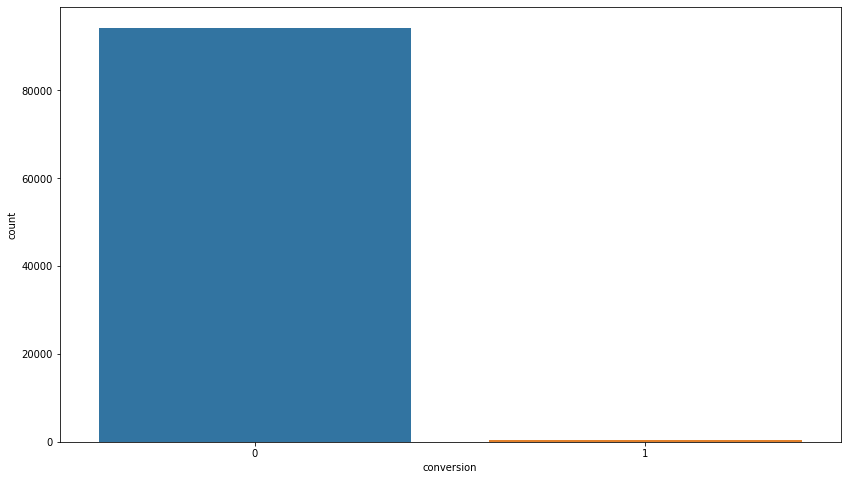

In [48]:
sns.countplot(df_conversion.conversion)

In [55]:
# what is the unbalance?

scale_pos_weight = np.sqrt(len(df_conversion.loc[df_conversion.conversion ==0])/ len(df_conversion.loc[df_conversion.conversion ==1]))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [57]:
# Instantiation
xgb_c = xgb.XGBClassifier(n_estimators = 100, seed = 42, scale_pos_weight=scale_pos_weight)
xgb_c.fit(X_train, y_train)
p_test = xgb_c.predict_proba(X_test)[:, 1]
y_pred = xgb_c.predict(X_test)

/home/sylvain/modelr-notebook/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sylvain/modelr-notebook/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[16:53:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


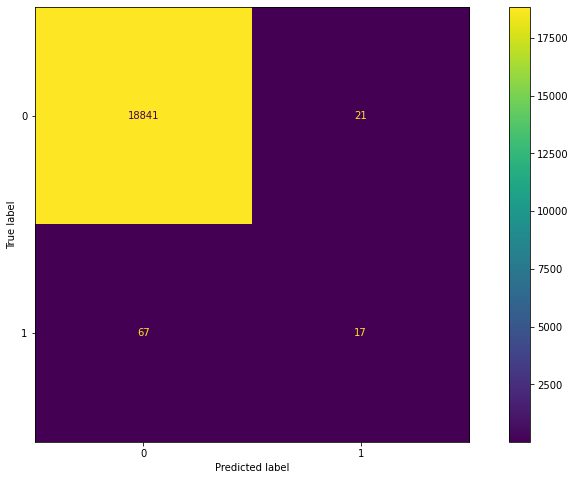

In [58]:
plot_confusion_matrix(xgb_c, X_test, y_test) 
plt.show()

In [59]:
roc_auc_score(y_test, p_test)

0.7342449040903606

In [60]:
f1_score(y_test, y_pred, average='macro')

0.6381793165709623

73% for AUC and 63% for F1-score score seem ok. Same remarks here concerning feature engineering, denoising of features.

Otherwise, I should also consider others algorithms, do a hyperoptimisation study notably benchmarking model algorithm, their hyperparameter, and also the loss considering there is a balancing issue here.\
Concerning, we should test different approaches for scale_pos_weight..\



# Conclusion

Few minutes left on the clock, and there is still so much to do. I try to keep going and give some first statistical results and models. Obviously, with more time, I would have spent more time to understand better the data given to me. Maybe I could feature engineer such as timestamp in slot.\

Concerning the code, due to time, I copy/paste some code which obviously I will factorize anyway. Here I chose a notebook because it is easier for testing and for a reviewer to follow my thought.